### Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# Importing the database

In [3]:
diamonds = pd.read_csv("../data/raw/diamonds_train.csv") 
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [4]:
# Checking the data type
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
# Checking the value number columns
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [7]:
# Total number of rows and columns
diamonds.shape

(40455, 10)

In [8]:
# Finding the null values.
print(diamonds.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Detecting Outliers

In [9]:
bp_carat=[diamonds["carat"]]
bp_depth=[diamonds["depth"]]
bp_table=[diamonds["table"]]
bp_price=[diamonds["price"]]

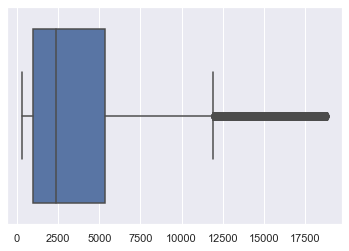

In [10]:
sns.boxplot(x=bp_price)

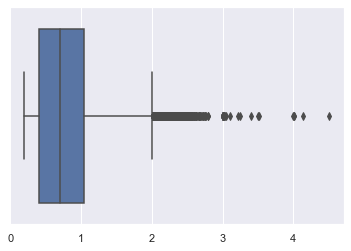

In [11]:
sns.boxplot(x=bp_carat)

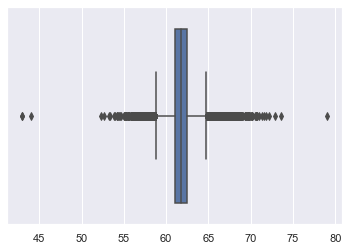

In [12]:
sns.boxplot(x=bp_depth)

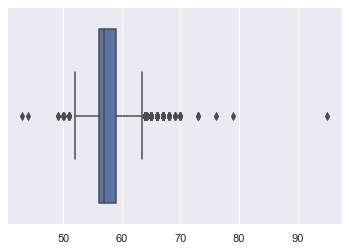

In [13]:
sns.boxplot(x=bp_table)

/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


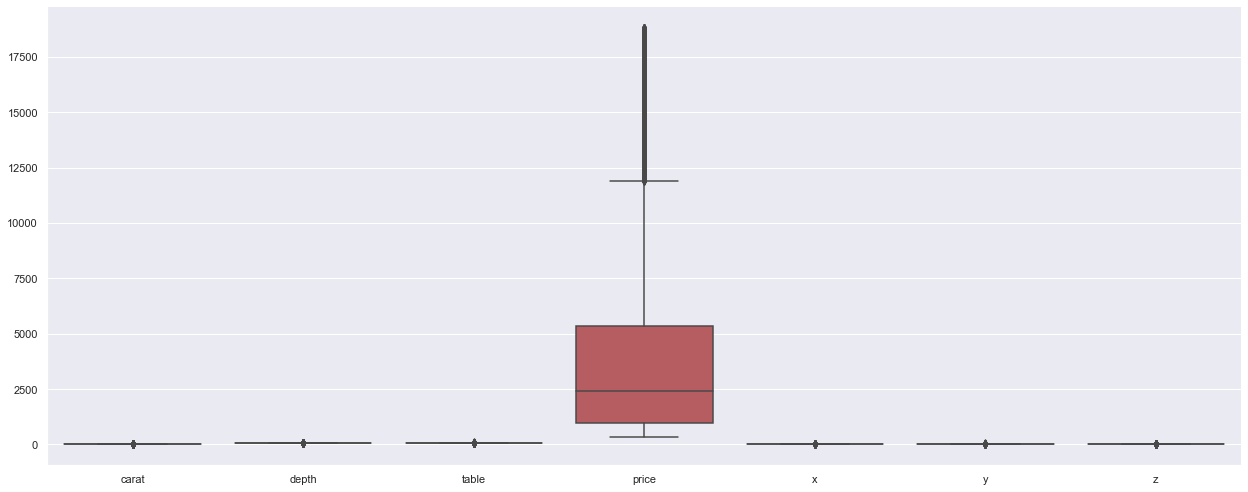

In [14]:
sns.factorplot(data=diamonds , kind='box' , size=7, aspect=2.5)

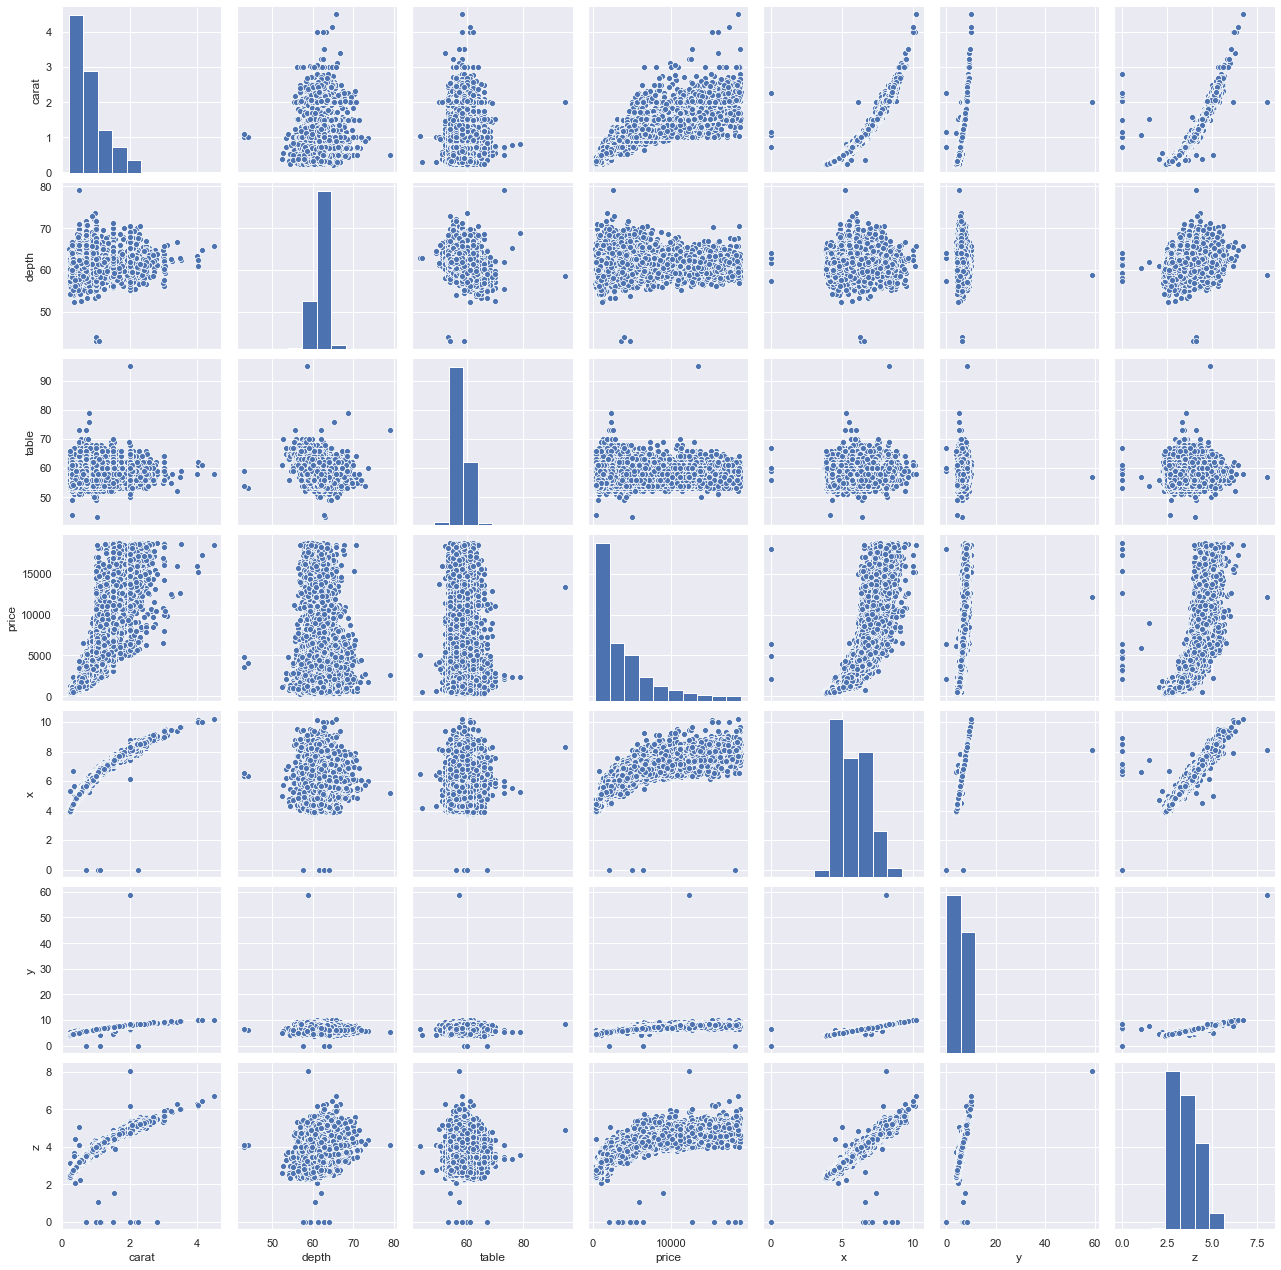

In [15]:
sns.pairplot(diamonds)

### Cleaning data

In [25]:
#Removing zero value that doesnt make sense

In [26]:
print("Number of rows with x == 0: {} ".format((diamonds.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamonds.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamonds.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamonds.depth==0).sum()))

Number of rows with x == 0: 0 
Number of rows with y == 0: 0 
Number of rows with z == 0: 0 
Number of rows with depth == 0: 0 


In [30]:
diamonds.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          16
dtype: int64

In [31]:
#Removing missing values

In [32]:
diamonds.dropna(inplace=True)

In [63]:
diamonds.shape

(40439, 10)

In [64]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [65]:
# Plotting a Histogram


/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1319ce6d8>,
      dtype=object)

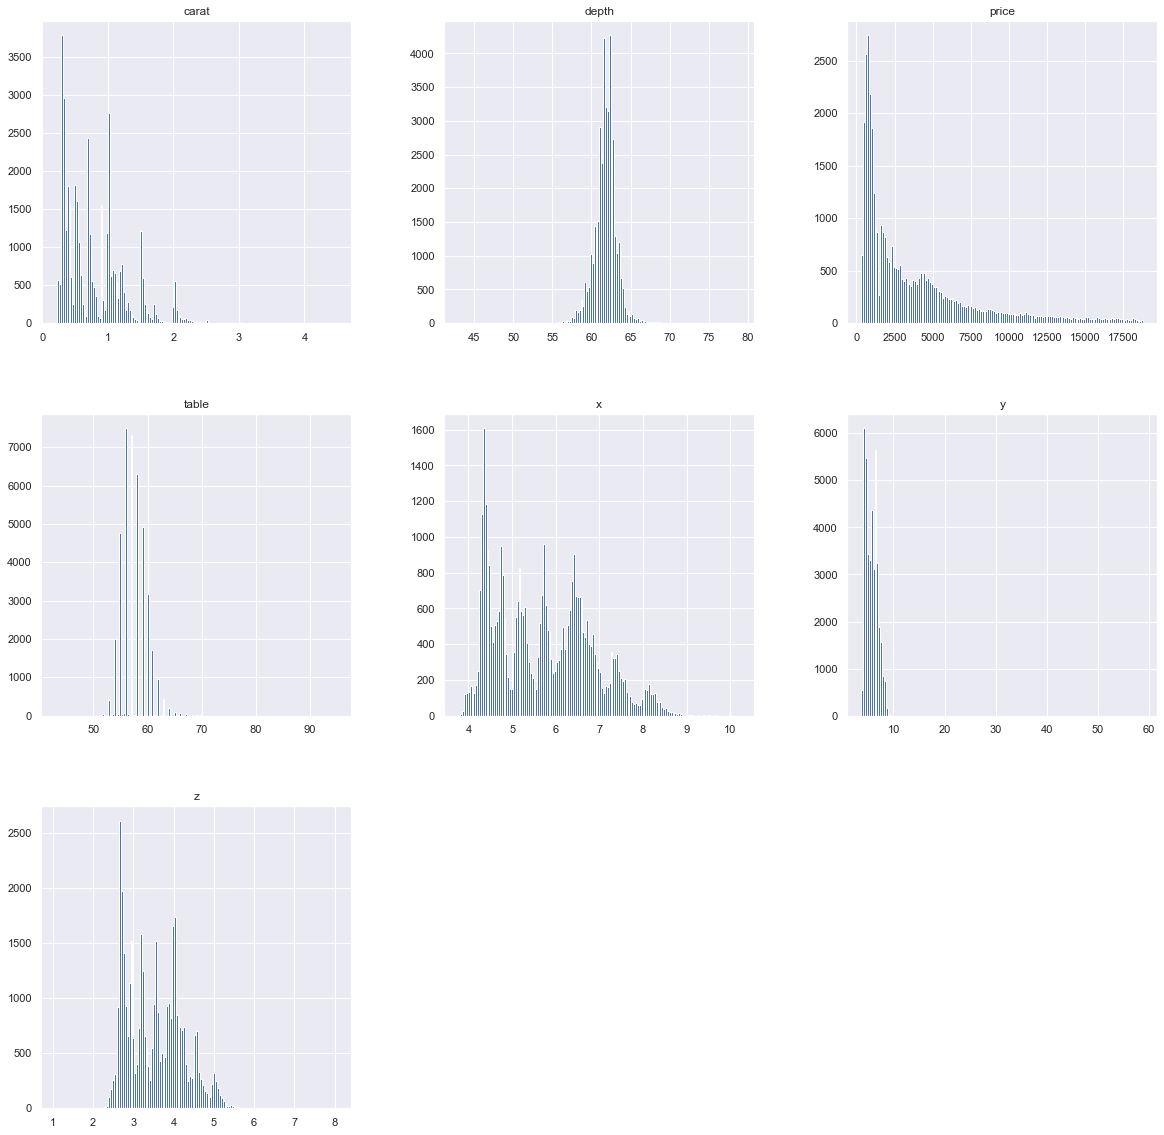

In [66]:
diamonds.hist(figsize = (20,20),bins=150)

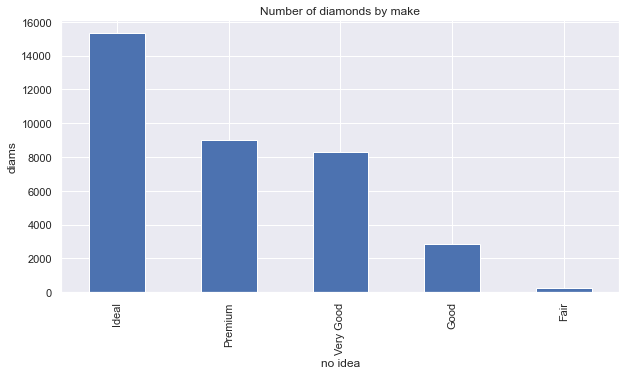

In [67]:
diamonds_cleaned.cut.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of diamonds by make")
plt.ylabel("diams")
plt.xlabel('no idea');

In [68]:
#Removing Outliers

In [69]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3-Q1
print(IQR)

carat       0.64
depth       1.50
table       3.00
price    4384.50
x           1.83
y           1.82
z           1.13
dtype: float64


In [70]:
diamonds_cleaned = diamonds[~((diamonds < (Q1-1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]
diamonds.shape

(40439, 10)

### Adding new columns

In [71]:
diamonds_cleaned.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
5,1.52,Ideal,F,SI2,61.2,57.0,9057,7.45,7.39,4.54


In [72]:
diamonds_cleaned["L/W"]=diamonds_cleaned["x"]/diamonds_cleaned["y"]

/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
color_order = {"D":1,
               "E":2,
               "F":3,
               "G":4,
               "H":5,
               "I":6,
               "J":7}
diamonds_cleaned["color_scale"] = diamonds_cleaned["color"].map(color_order)

/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
diamonds_cleaned["grams"] = diamonds_cleaned["carat"]*0.2

/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
diamonds_cleaned["ppg"] = diamonds_cleaned["price"]/diamonds_cleaned["grams"] 

/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
clarity_order={"IF":1,
               "VVS1":2,
               "VVS2":3,
               "VS1":4,
               "VS2":5,
               "SI1":6,
               "SI2":7,
               "I1":8}

/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ignaciosanchezjurado/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
diamonds_cleaned["clarity_scale"] = diamonds_cleaned["clarity"].map(clarity_order)
cut_order= {"Fair":1,
            "Good":2,
            "Very Good":3,
            "Premium":4,
            "Ideal":5}
diamonds_cleaned["cut_scale"] = diamonds_cleaned["cut"].map(cut_order)

In [77]:
diamonds_cleaned.to_csv("../data/processed/diamonds_cleaned.csv",index= False) 

In [78]:
#More charts

,carat,depth,table,price,x,y,z,L/W,color_scale,grams,ppg,clarity_scale,cut_scale
carat,1.000000,0.034329,0.187343,0.922722,0.986291,0.985476,0.985229,0.135651,0.258214,1.000000,0.776260,0.361073,-0.129991
depth,0.034329,1.000000,-0.240469,0.002139,-0.012200,-0.013765,0.090921,0.029065,0.047143,0.034329,-0.026449,0.069927,-0.279100
table,0.187343,-0.240469,1.000000,0.138122,0.186571,0.181284,0.159537,0.123537,0.021138,0.187343,0.090857,0.152620,-0.405116
price,0.922722,0.002139,0.138122,1.000000,0.899916,0.901163,0.896566,0.092822,0.140664,0.922722,0.928728,0.146766,-0.068629
x,0.986291,-0.012200,0.186571,0.899916,1.000000,0.998607,0.993520,0.151424,0.235391,0.986291,0.786775,0.375243,-0.110312
y,0.985476,-0.013765,0.181284,0.901163,0.998607,1.000000,0.993337,0.099959,0.235266,0.985476,0.788997,0.370303,-0.113996
z,0.985229,0.090921,0.159537,0.896566,0.993520,0.993337,1.000000,0.128773,0.239144,0.985229,0.781524,0.377893,-0.140645
L/W,0.135651,0.029065,0.123537,0.092822,0.151424,0.099959,0.128773,1.000000,0.026821,0.135651,0.072834,0.142164,0.051609
color_scale,0.258214,0.047143,0.021138,0.140664,0.235391,0.235266,0.239144,0.026821,1.000000,0.258214,-0.019704,-0.053830,-0.014066
grams,1.000000,0.034329,0.187343,0.922722,0.986291,0.985476,0.985229,0.135651,0.258214,1.000000,0.776260,0.361073,-0.129991


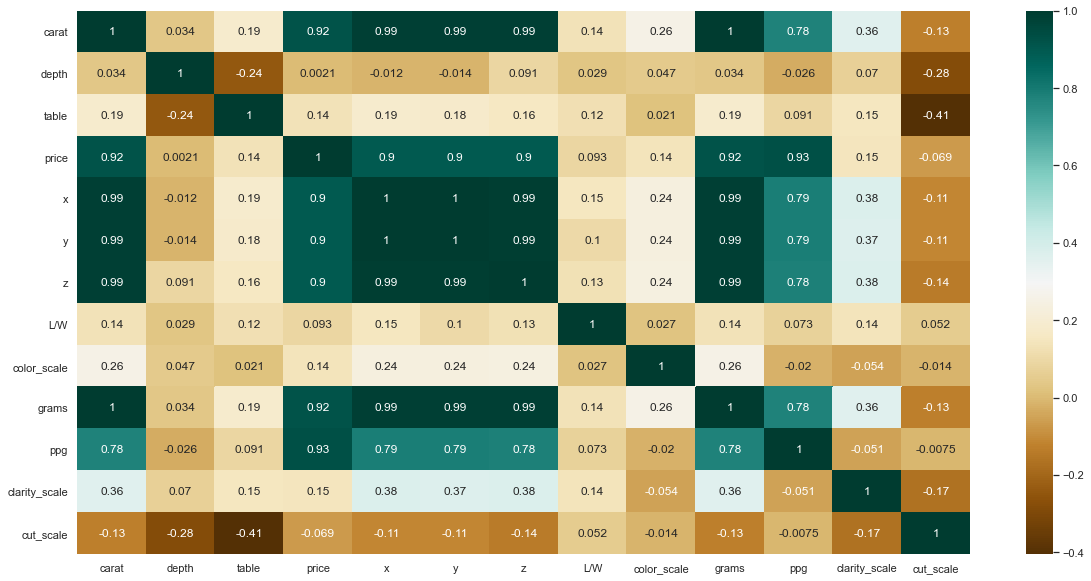

In [79]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= diamonds_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

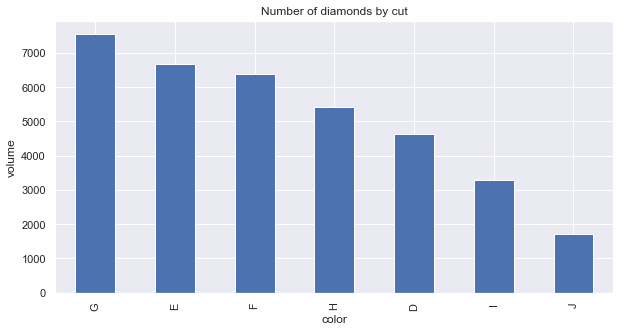

In [80]:
diamonds_cleaned.color.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of diamonds by cut")
plt.ylabel("volume")
plt.xlabel('color');

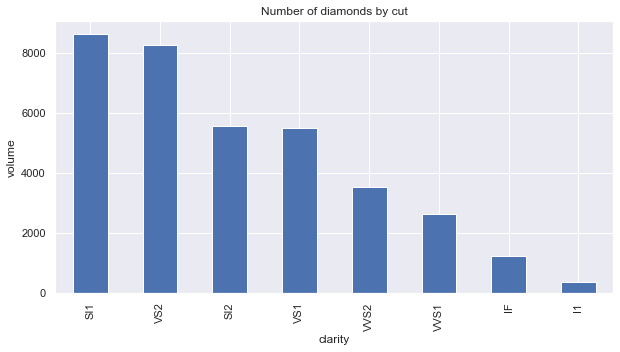

In [81]:
diamonds_cleaned.clarity.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of diamonds by cut")
plt.ylabel("volume")
plt.xlabel('clarity');

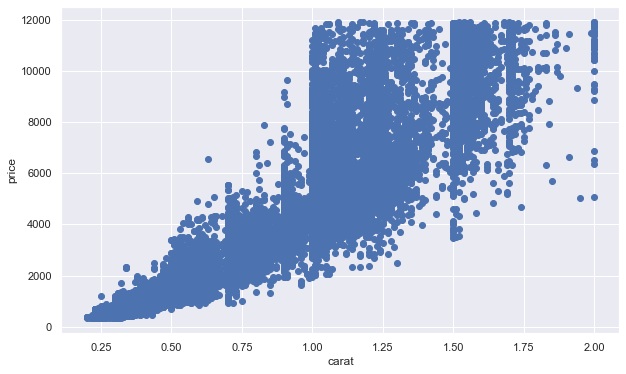

In [82]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(diamonds_cleaned['carat'], diamonds_cleaned['price'])
ax.set_xlabel('carat')
ax.set_ylabel('price')
plt.show()

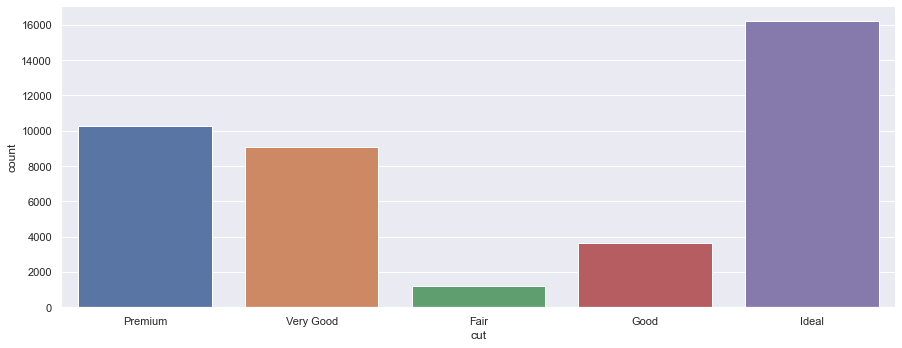

In [83]:
sns.catplot(x='cut', data=diamonds , kind='count',aspect=2.5 )

,carat,depth,table,price,x,y,z,L/W,color_scale,grams,ppg,clarity_scale,cut_scale
carat,1.000000,0.034329,0.187343,0.922722,0.986291,0.985476,0.985229,0.135651,0.258214,1.000000,0.776260,0.361073,-0.129991
depth,0.034329,1.000000,-0.240469,0.002139,-0.012200,-0.013765,0.090921,0.029065,0.047143,0.034329,-0.026449,0.069927,-0.279100
table,0.187343,-0.240469,1.000000,0.138122,0.186571,0.181284,0.159537,0.123537,0.021138,0.187343,0.090857,0.152620,-0.405116
price,0.922722,0.002139,0.138122,1.000000,0.899916,0.901163,0.896566,0.092822,0.140664,0.922722,0.928728,0.146766,-0.068629
x,0.986291,-0.012200,0.186571,0.899916,1.000000,0.998607,0.993520,0.151424,0.235391,0.986291,0.786775,0.375243,-0.110312
y,0.985476,-0.013765,0.181284,0.901163,0.998607,1.000000,0.993337,0.099959,0.235266,0.985476,0.788997,0.370303,-0.113996
z,0.985229,0.090921,0.159537,0.896566,0.993520,0.993337,1.000000,0.128773,0.239144,0.985229,0.781524,0.377893,-0.140645
L/W,0.135651,0.029065,0.123537,0.092822,0.151424,0.099959,0.128773,1.000000,0.026821,0.135651,0.072834,0.142164,0.051609
color_scale,0.258214,0.047143,0.021138,0.140664,0.235391,0.235266,0.239144,0.026821,1.000000,0.258214,-0.019704,-0.053830,-0.014066
grams,1.000000,0.034329,0.187343,0.922722,0.986291,0.985476,0.985229,0.135651,0.258214,1.000000,0.776260,0.361073,-0.129991


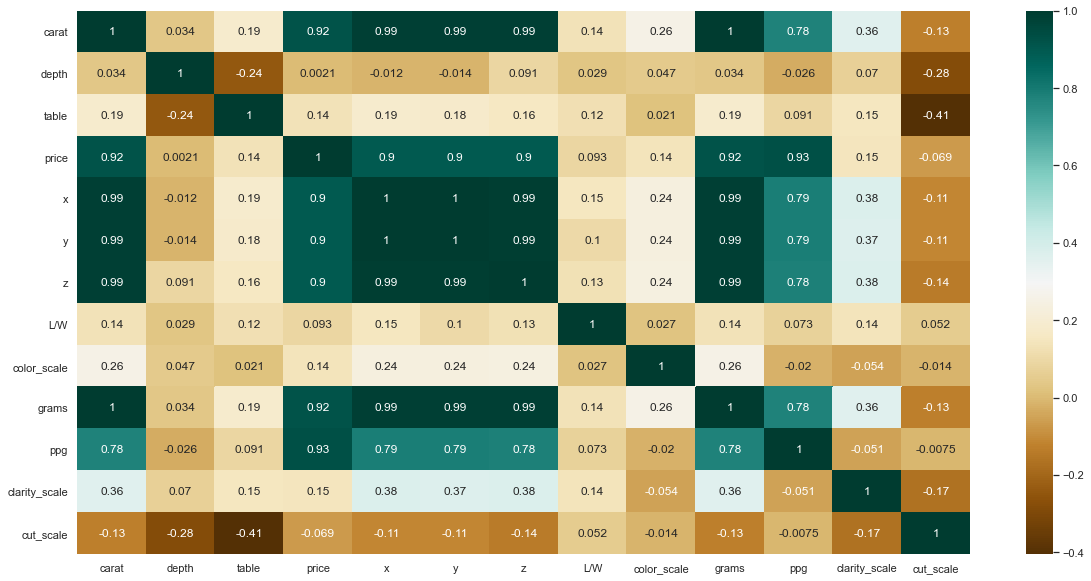

In [84]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
correl= diamonds_cleaned.corr()
sns.heatmap(correl,cmap="BrBG",annot=True)
correl

In [85]:
correl.to_csv("../data/processed/correl_diamonds.csv",index= False) 

In [86]:
diam_corr = diamonds_cleaned[["price","carat","cut_scale","clarity_scale","color_scale","ppg"]]

,price,carat,cut_scale,clarity_scale,color_scale,ppg
price,1.000000,0.922722,-0.068629,0.146766,0.140664,0.928728
carat,0.922722,1.000000,-0.129991,0.361073,0.258214,0.776260
cut_scale,-0.068629,-0.129991,1.000000,-0.168341,-0.014066,-0.007495
clarity_scale,0.146766,0.361073,-0.168341,1.000000,-0.053830,-0.051486
color_scale,0.140664,0.258214,-0.014066,-0.053830,1.000000,-0.019704
ppg,0.928728,0.776260,-0.007495,-0.051486,-0.019704,1.000000


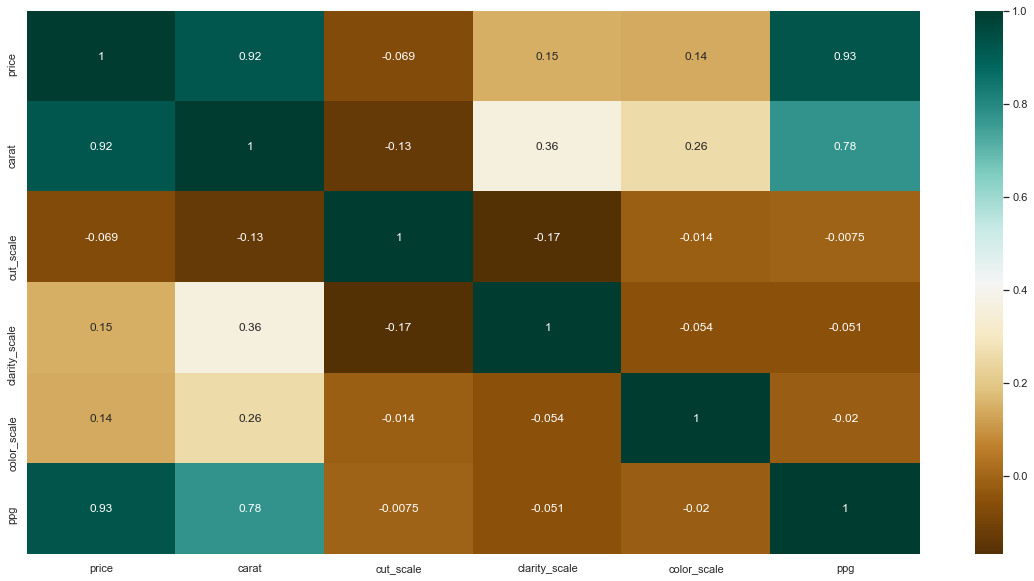

In [87]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
correl2= diam_corr.corr()
sns.heatmap(correl2,cmap="BrBG",annot=True)
correl2